In [1]:
from __future__ import print_function
import os

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# Ingestión de datos and Data Cleaning

In [2]:
data_path = ['data']
file_names = ['January.csv', 'February.csv', 'March.csv', 'April.csv', 'May.csv', 'June.csv',
              'July.csv', 'August.csv', 'September.csv', 'October.csv', 'November.csv', 'December.csv']
datasets = []
# filepath = osæ÷.sep.join(data_path + [file_name])
for file_name in file_names:
    filepath = os.sep.join(data_path + [file_name])
    datasets.append(pd.read_csv(filepath, low_memory=False))
    
dataset = pd.concat(datasets, ignore_index=True)

The first 5 observations are presented and the dimension of the dataset. We notice now tha amount of observations is way higher than the amount of features, which it's quite positve when we apply stadistics models.

In [3]:
display(dataset.shape)
display(dataset.head(5))

(480085, 37)

,MONTH,DAY_OF_MONTH,UNIQUE_CARRIER,AIRLINE_ID,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ORIGIN_WAC,...,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 36
0,1,15,AA,19805,12953,LGA,"New York, NY",NY,New York,22,...,87.0,1.0,544.0,3,NaN,NaN,NaN,NaN,NaN,NaN
1,1,22,AA,19805,12953,LGA,"New York, NY",NY,New York,22,...,93.0,1.0,544.0,3,NaN,NaN,NaN,NaN,NaN,NaN
2,1,29,AA,19805,12953,LGA,"New York, NY",NY,New York,22,...,88.0,1.0,544.0,3,NaN,NaN,NaN,NaN,NaN,NaN
3,1,9,AA,19805,12953,LGA,"New York, NY",NY,New York,22,...,86.0,1.0,544.0,3,NaN,NaN,NaN,NaN,NaN,NaN
4,1,10,AA,19805,12953,LGA,"New York, NY",NY,New York,22,...,87.0,1.0,544.0,3,NaN,NaN,NaN,NaN,NaN,NaN


We can see the presence of two features without name _"Unnamed: 0"_ and _"Unnamed: 36"_. In the case of the frist feature it seems to fullfil a function of order, an index of some sort, as we already have the index loaded by default by pandas if we confirm our hypothesis then the column can be removed. The second feauture seems to be full of 'NaN' values.

In [4]:
# display(pd.Series(dataset.index).equals(dataset["Unnamed: 0"]))

display(dataset["Unnamed: 36"].isna().all())

#display(dataset['FLIGHTS'].equals(pd.Series(np.ones(480085))))


True

We can see now that the _`Unnamed: 0`_ column was indeed an index therefore we dropped it, also _`Unnamed: 36`_ only has _NAN_ values  hence we concluded that it is imposible to get information from it and we dropped it as well.

In [5]:
# dataset = dataset.drop(columns=['Unnamed: 36','Unnamed: 0'])
dataset = dataset.drop(columns=['Unnamed: 36'])

It may be interesting to see how many `NaN` values each feature has and the type of variable that python is interpreting since this database has too many categorical features.

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480085 entries, 0 to 480084
Data columns (total 36 columns):
MONTH                  480085 non-null int64
DAY_OF_MONTH           480085 non-null int64
UNIQUE_CARRIER         480085 non-null object
AIRLINE_ID             480085 non-null int64
ORIGIN_AIRPORT_ID      480085 non-null int64
ORIGIN                 480085 non-null object
ORIGIN_CITY_NAME       480085 non-null object
ORIGIN_STATE_ABR       480085 non-null object
ORIGIN_STATE_NM        480085 non-null object
ORIGIN_WAC             480085 non-null int64
DEST_AIRPORT_ID        480085 non-null int64
DEST                   480085 non-null object
DEST_CITY_NAME         480085 non-null object
DEST_STATE_ABR         480085 non-null object
DEST_STATE_NM          480085 non-null object
DEST_WAC               480085 non-null int64
DEP_DELAY              468236 non-null float64
DEP_DELAY_NEW          468236 non-null float64
DEP_DEL15              468236 non-null float64
TAXI_OUT           

From the last table we got 2 important observations:
- No variable was interpreted as a categorical, so we will have to change it by ourselves. 
- We noticed an important pattern in the features related to delay causes. They are those that show a higher amount of `NaN` values, actually, all of them have the same amount of `NaN` values, this lead us to consider the possibility that a `NaN` value means that there was no delay at all or the delay was considered acceptable and because of this they didn't register anything about the delay cause, this hypotesis will become more relevant once we see the next result.

In [7]:
seasons = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer',
           7: 'Summer', 8: 'Summer', 9: 'Autumn', 10: 'Autumn', 11: 'Autumn', 12: 'Winter'
}
seasons = pd.DataFrame(list(seasons.items()), columns=['MONTH', 'SEASON'])
dataset = dataset.merge(seasons, on='MONTH')

In [8]:
dataset['MONTH'] = dataset.MONTH.astype('category')
dataset['UNIQUE_CARRIER'] = dataset.UNIQUE_CARRIER.astype('category')
dataset['AIRLINE_ID'] = dataset.AIRLINE_ID.astype('category')
dataset['ORIGIN_AIRPORT_ID'] = dataset.ORIGIN_AIRPORT_ID.astype('category')
dataset['ORIGIN'] = dataset.ORIGIN.astype('category')
dataset['ORIGIN_STATE_ABR'] = dataset.ORIGIN_STATE_ABR.astype('category')
dataset['DEST_AIRPORT_ID'] = dataset.DEST_AIRPORT_ID.astype('category')
dataset['DEST'] = dataset.DEST.astype('category')
dataset['DEST_STATE_ABR'] = dataset.DEST_STATE_ABR.astype('category')
dataset['DEP_DEL15'] = dataset.DEP_DEL15.astype('category')
dataset['ARR_DEL15'] = dataset.ARR_DEL15.astype('category')
dataset['CANCELLED'] = dataset.CANCELLED.astype('category')
dataset['DIVERTED'] = dataset.DIVERTED.astype('category')
dataset['SEASON'] = dataset.SEASON.astype('category')


mascara = dataset['ARR_DELAY']>60
mascara2 = dataset['DEP_DELAY']>60 
mascara3 = mascara | mascara2
tabla = dataset[mascara3].info()

del mascara,mascara2,mascara3, tabla

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49895 entries, 7 to 480070
Data columns (total 37 columns):
MONTH                  49895 non-null category
DAY_OF_MONTH           49895 non-null int64
UNIQUE_CARRIER         49895 non-null category
AIRLINE_ID             49895 non-null category
ORIGIN_AIRPORT_ID      49895 non-null category
ORIGIN                 49895 non-null category
ORIGIN_CITY_NAME       49895 non-null object
ORIGIN_STATE_ABR       49895 non-null category
ORIGIN_STATE_NM        49895 non-null object
ORIGIN_WAC             49895 non-null int64
DEST_AIRPORT_ID        49895 non-null category
DEST                   49895 non-null category
DEST_CITY_NAME         49895 non-null object
DEST_STATE_ABR         49895 non-null category
DEST_STATE_NM          49895 non-null object
DEST_WAC               49895 non-null int64
DEP_DELAY              49895 non-null float64
DEP_DELAY_NEW          49895 non-null float64
DEP_DEL15              49895 non-null category
TAXI_OUT        

The results we got when we only considered the subset of observations in which there was a delay over 30 minutes are just as we expected them to be. We can see that most of the observations have their delay cause registered, actually, the higher the delay is the more `non-null values` you get in the features we are studying. This result makes us think that probably airports have to register very well every reason why they are falling behind the schedule but when the delay isn't that much it's not that important to register the cause. Later on we are going discuss more about the features related to delay.

# About New York...

## Coming to New York

This section is going to be about.............

First we are going to see the distribution of the flights that came to New York on 2017.

,Frequency,Relative frequency (%%)
Florida,56632,23.082504
California,25346,10.330717
Illinois,21082,8.592763
Georgia,18920,7.711558
North Carolina,13525,5.512623


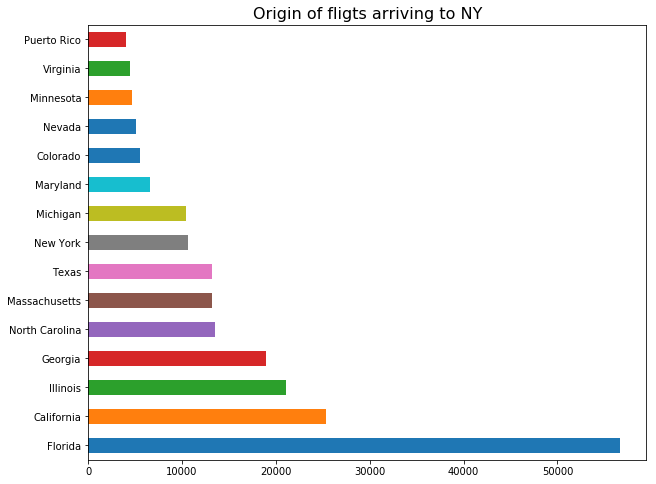

In [9]:
temp = dataset[dataset.DEST_STATE_ABR == 'NY'] #Filtro que permite centrarnos unicamente en los vuelos que se dirigen a NY

origin_flights = pd.DataFrame()
origin_flights["Frequency"] = temp['ORIGIN_STATE_NM'].value_counts()
origin_flights["Relative frequency (%%)"] = 100 * temp['ORIGIN_STATE_NM'].value_counts(normalize=True)
display(origin_flights.head())

f, ax = plt.subplots(1,1, figsize=(10,8))
ax = temp['ORIGIN_STATE_NM'].value_counts().head(15).plot(kind='barh', ax=ax)
ax.set_title('Origin of fligts arriving to NY', fontsize=16)
plt.show()

In [10]:
us_state_abbrev = {'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California', 
                   'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 
                   'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 
                   'IA': 'Iowa', 'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 
                   'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 
                   'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 
                   'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 
                   'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 
                   'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 
                   'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 
                   'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 
                   'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming', 'VI': 'Virgin Islands',
                   'PR': 'Puerto Rico'}

missing_states = ['AK', 'CT', 'DE', 'ID', 'IA', 'KS', 'MS', 'ND', 'OK', 'RI', 'SD', 'WV']
missing_states = pd.Series(missing_states, name='state').to_frame()

# temp = dataset[dataset.DEST_STATE_ABR == 'NY']
origin_counts = temp.ORIGIN_STATE_ABR.value_counts().to_frame()
origin_counts = origin_counts.reset_index().rename(columns={'index':'state'})
origin_counts = origin_counts.merge(missing_states, on='state', how='outer')
origin_counts['state_name'] = origin_counts.state.replace(us_state_abbrev)
origin_counts.state = origin_counts.state.astype(str)

origin_counts['text'] = origin_counts.apply(
    lambda x: '%s<br> %s flights to NY' %(x.state_name, x.ORIGIN_STATE_ABR), axis=1, )

In [11]:
data = [ dict(
        type='choropleth',
        autocolorscale = True,
        locations = origin_counts.state,
        z = origin_counts.ORIGIN_STATE_ABR,
        locationmode = 'USA-states',
        text = origin_counts['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Domestic Flights")
        ) ]

layout = dict(
        title = '2017 Domestic flights destination New York',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(0, 153, 255)'),
        )
    
fig = dict( data=data, layout=layout )
iplot(fig)

We can see that the big majority of flights with destiny to New York come from `Florida` with more than 50.000 flights which is twice the number of flights from `California` (second state with more flights coming to `NY`)

It may be worth to study the amount of flights coming to `New York` in the different states of the year.

In [12]:
#Podriamos cambiarla a que no lo diga por estado, solo en total. Y hacerlo hacerlo por epoca del año como primavera y asi
pd.crosstab(index=temp['ORIGIN_STATE_NM'], columns=temp['SEASON'], margins=True)

SEASON,Autumn,Spring,Summer,Winter,All
ORIGIN_STATE_NM,,,,,
Alabama,79,122,122,113,436
Arizona,702,866,788,744,3100
Arkansas,56,77,73,59,265
California,6211,6487,6578,6070,25346
Colorado,1359,1357,1586,1267,5569
Florida,12875,15566,13517,14674,56632
Georgia,4745,4858,4904,4413,18920
Hawaii,86,110,92,137,425
Illinois,5610,4839,6132,4501,21082


Given the results it seems like at least in 2017 the state of the year wasn't something impactful enough to make big changes in the quantity of flights that came to New York. To confirm that we looking at the distribution of flights coming to New York in each month.

In [13]:
#Distribución de los vuelos con destino a NY durante el año.
temp2 = 100 * temp['MONTH'].value_counts(normalize=True).to_frame()

temp2.columns = ['Relative frequency (%)']
display(temp2)

,Relative frequency (%)
8,8.924947
3,8.844652
7,8.700366
5,8.575237
6,8.570346
10,8.493719
4,8.305821
12,8.186806
11,8.049449
9,7.998500


We conclude that `Month` is not a big factor when we talk about what makes people come to `New York`.

## Coming out from New York

Let's analyze now the states that are destiny for the flights coming out from `New York`.

,Frequecy,Relative frequency (%)
Florida,56595,23.065073
California,25352,10.332109
Illinois,21229,8.651797
Georgia,18912,7.707512
North Carolina,13567,5.529178


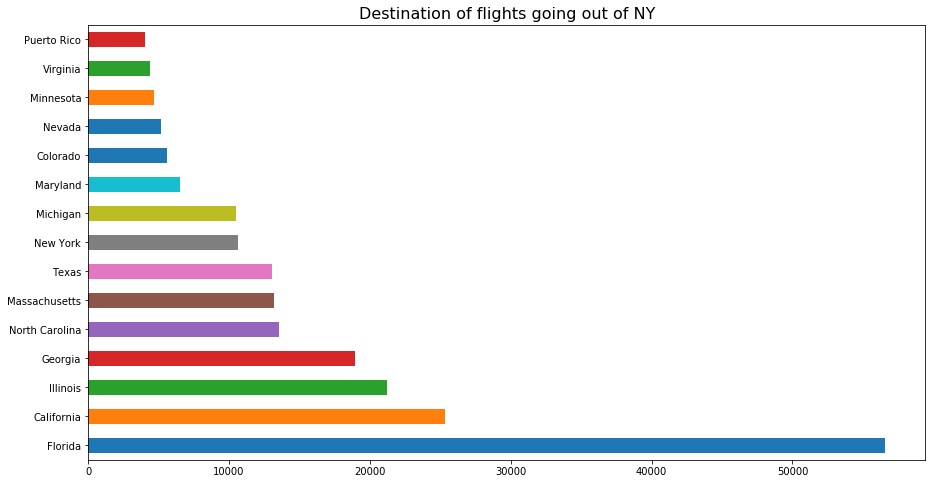

In [14]:
#Tabla de frecuencia de ciudades de destino.
temp = dataset[dataset.ORIGIN_STATE_ABR == 'NY'] #Filtro que permite centrarnos unicamente en los vuelos que se dirigen a NY

dest_flights = pd.DataFrame()
dest_flights["Frequency"] = pd.value_counts(temp['DEST_STATE_NM'])
dest_flights["Relative frequency (%%)"] = 100 * temp['DEST_STATE_NM'].value_counts(normalize=True)
dest_flights.columns = ['Frequecy' , 'Relative frequency (%)']
display(dest_flights.head())

f, ax = plt.subplots(1,1, figsize=(15, 8))
ax = temp['DEST_STATE_NM'].value_counts().head(15).plot(kind='barh', ax=ax)
ax.set_title('Destination of flights going out of NY', fontsize=16)
plt.show()

In [15]:
# temp = dataset[dataset.ORIGIN_STATE_ABR == 'NY']
dest = temp.DEST_STATE_ABR.value_counts().to_frame()
dest = dest.reset_index().rename(columns={'index':'state'})
dest = dest.merge(missing_states, on='state', how='outer')
dest['state_name'] = dest.state.replace(us_state_abbrev)
dest.state = dest.state.astype(str)

dest['text'] = dest.apply(
    lambda x: '%s<br> %s flights from NY' %(x.state_name, x.DEST_STATE_ABR), axis=1, )

data = [ dict(
        type='choropleth',
        autocolorscale = True,
        locations = origin_counts.state,
        z = origin_counts.ORIGIN_STATE_ABR,
        locationmode = 'USA-states',
        text = origin_counts['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Domestic Flights")
        ) ]

layout = dict(
        title = '2017 Domestic flights from New York',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(0, 153, 255)'),
        )
    
fig = dict( data=data, layout=layout )
iplot( fig)

We observe that most of the flights coming out from `New York` have destiny to the same states that visit `New York` the most. This is interesting but at the same time makes sense since we can expect that people who live in `Florida` for example and visit `New York` would need to go back home in less than a year and the same thing functions for people who live in `New York` and visit `Florida`.

Let's analyze now the distribution of the flights coming out from `New York`.

In [16]:
#Distribución de los vuelos con origen en NY durante el año.
temp = 100 * temp['MONTH'].value_counts(normalize=True).to_frame()
temp.columns = ['Relative frequency (%)']
display(temp)

,Relative frequency (%)
8,8.923630
3,8.841306
7,8.701110
6,8.574363
5,8.574363
10,8.496522
4,8.303752
12,8.187194
11,8.048628
9,7.998093


It looks like month isn't a big changer in the quantity of flights coming out from `New York`.

In [17]:
#Tabla de freciencia de vuelos cancelados
tabla = pd.value_counts(dataset['CANCELLED']).to_frame()
tabla["Relative frequency (%)"] = 100 * dataset['CANCELLED'].value_counts(normalize=True)
tabla.columns = ['Frequency' , 'Relative frequency (%)']
tabla.index = ['Not cancelled',"Cancelled"]
display(tabla)

del tabla

,Frequency,Relative frequency (%)
Not cancelled,467842,97.449827
Cancelled,12243,2.550173


# Delay Analysis

Now we are going focus our attention into the features related to delays. Because of it we are only needing some of the features we had in the original dataset.

In [18]:
delay_columns = ['MONTH', 'UNIQUE_CARRIER', 'AIRLINE_ID', 'ORIGIN_AIRPORT_ID', 'ORIGIN_CITY_NAME',
                 'ORIGIN_STATE_ABR', 'ORIGIN_WAC', 'DEST_AIRPORT_ID', 'DEST_CITY_NAME', 'DEST_STATE_ABR',
                 'DEST_WAC', 'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DEL15', 'TAXI_OUT', 'TAXI_IN', 'ARR_DELAY',
                 'ARR_DELAY_NEW', 'ARR_DEL15', 'CANCELLED', 'DIVERTED', 'AIR_TIME', 'FLIGHTS',
                 'DISTANCE', 'DISTANCE_GROUP', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
                 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'SEASON']
delay_data = dataset.loc[:, delay_columns].copy()

To begin the analysis we'll need do something about the null values. So far we've found out that the main reason why there are too many null values is because the delay wasn't that important in terms of time, however, for the analyzis incoming we need to define what we are going to do with these. A first approach may be to replace the null values with the mean of the values we have in each feature, this way we would replace the null values for the average time in each of those features.

Our next result is going to help us to decide if this is a viable option.

In [19]:
desc_columns = [17,23]
desc = dataset.iloc[:, desc_columns]
display(desc.describe())
#Graficarlos a los 2 por separado
#desc['DEP_DELAY_NEW'].dropna().hist(bins=50)
#desc['ARR_DELAY_NEW'].dropna().hist(bins=30)

,DEP_DELAY_NEW,ARR_DELAY_NEW
count,468236.000000,466352.000000
mean,18.434883,18.213442
std,53.125508,52.307365
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,11.000000,12.000000
max,1685.000000,1589.000000


From the last result we see that more than a 50% of the data says there was no delay. However, given the high variance it wouldn't be trustworthy to consider the mean as a good aproximation of the values we should have instead of the null values. We conclude is that most of the flights do not fall behind on schedule but when they do it the time it takes vary quite a lot.

Because of all what we said in the previous result we decided to don't make any assumption about the null values and just drop them, this way we avoid the possibility of getting inaccurate results for bad manipulation of the data.

In [20]:
delay_data = delay_data.dropna()

Let's observe the correlation matrix.

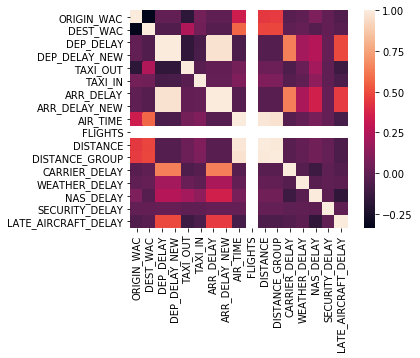

In [21]:
sns.heatmap(delay_data.corr(), square=True)

Most of the information we got from the correlation matrix wasn't that useful since we already knew they were correlated. Besides that we see that the feature flights seems....

In order to find more patterns related to delays we are going to analyze the next graphics.

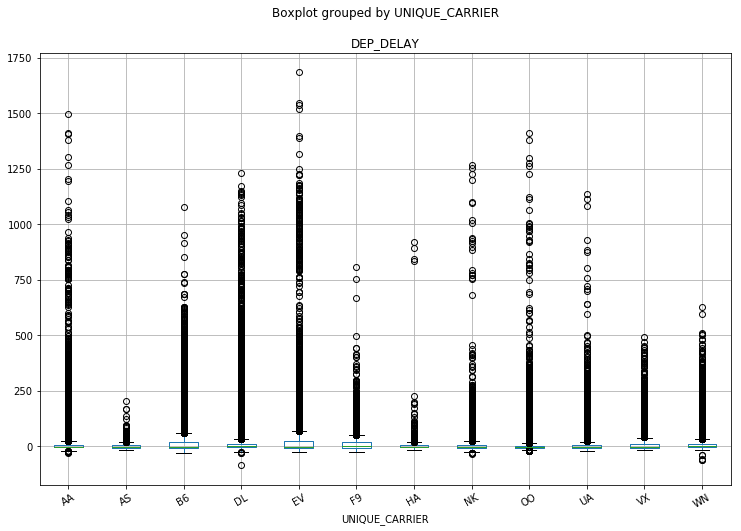

In [22]:
ax = dataset.boxplot('DEP_DELAY','UNIQUE_CARRIER',rot = 30,figsize=(12,8))
# display(ax)
plt.show()

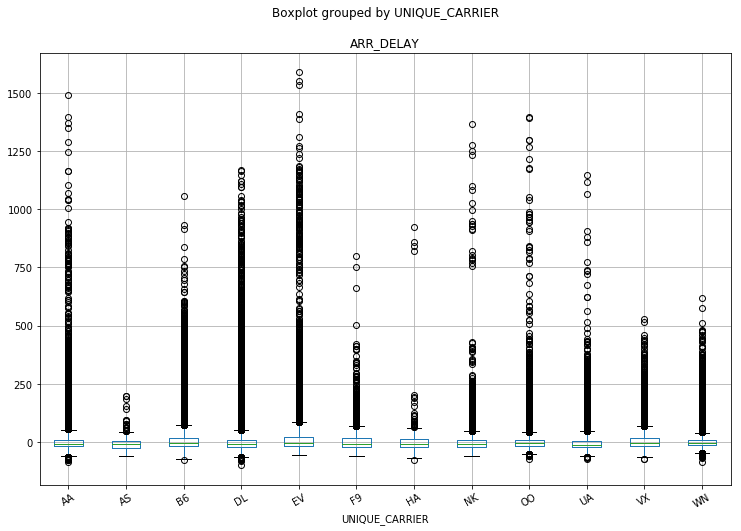

In [23]:
dataset.boxplot('ARR_DELAY','UNIQUE_CARRIER',rot = 30,figsize=(12,8))
plt.show()

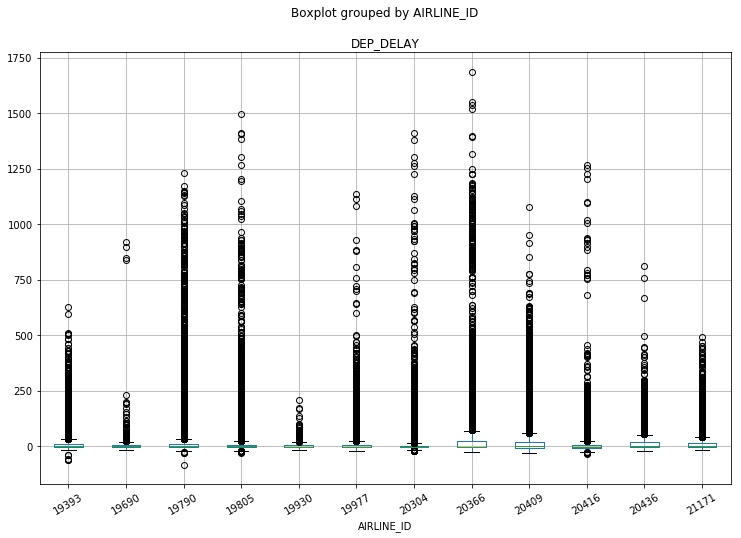

In [24]:
dataset.boxplot('DEP_DELAY','AIRLINE_ID',rot = 30,figsize=(12,8))
plt.show()

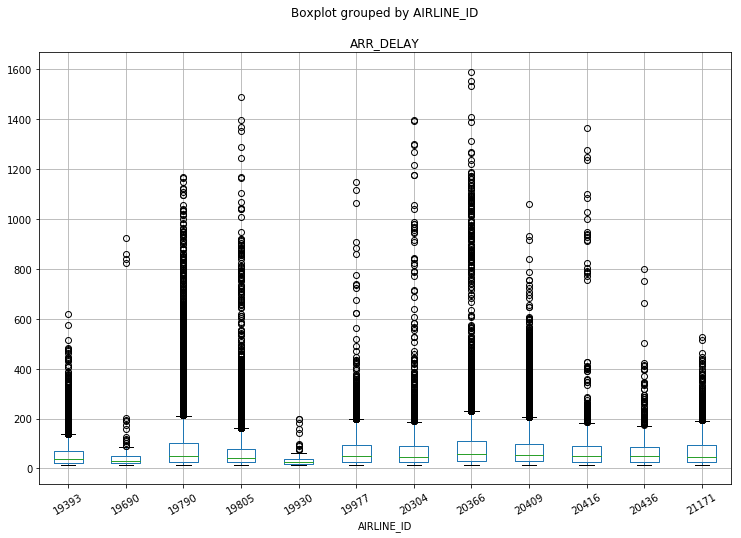

In [25]:
delay_data.boxplot('ARR_DELAY','AIRLINE_ID',rot = 30,figsize=(12, 8))
plt.show()

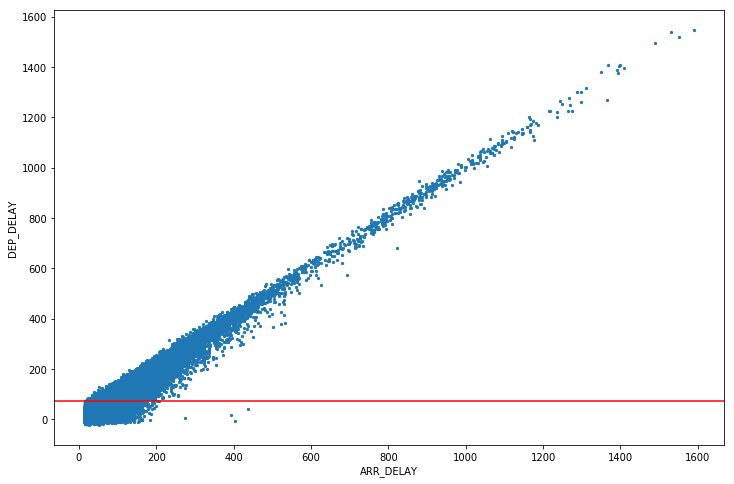

In [26]:
# delay_data.ORIGIN_AIRPORT_ID.value_counts()

%matplotlib inline
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

delay_data[delay_data.DEP_DELAY < 1200000].plot(kind='scatter', y='DEP_DELAY', x='ARR_DELAY', marker='.' , ax=ax)
ax.axhline(delay_data.DEP_DELAY.mean(), color='r')
plt.show()


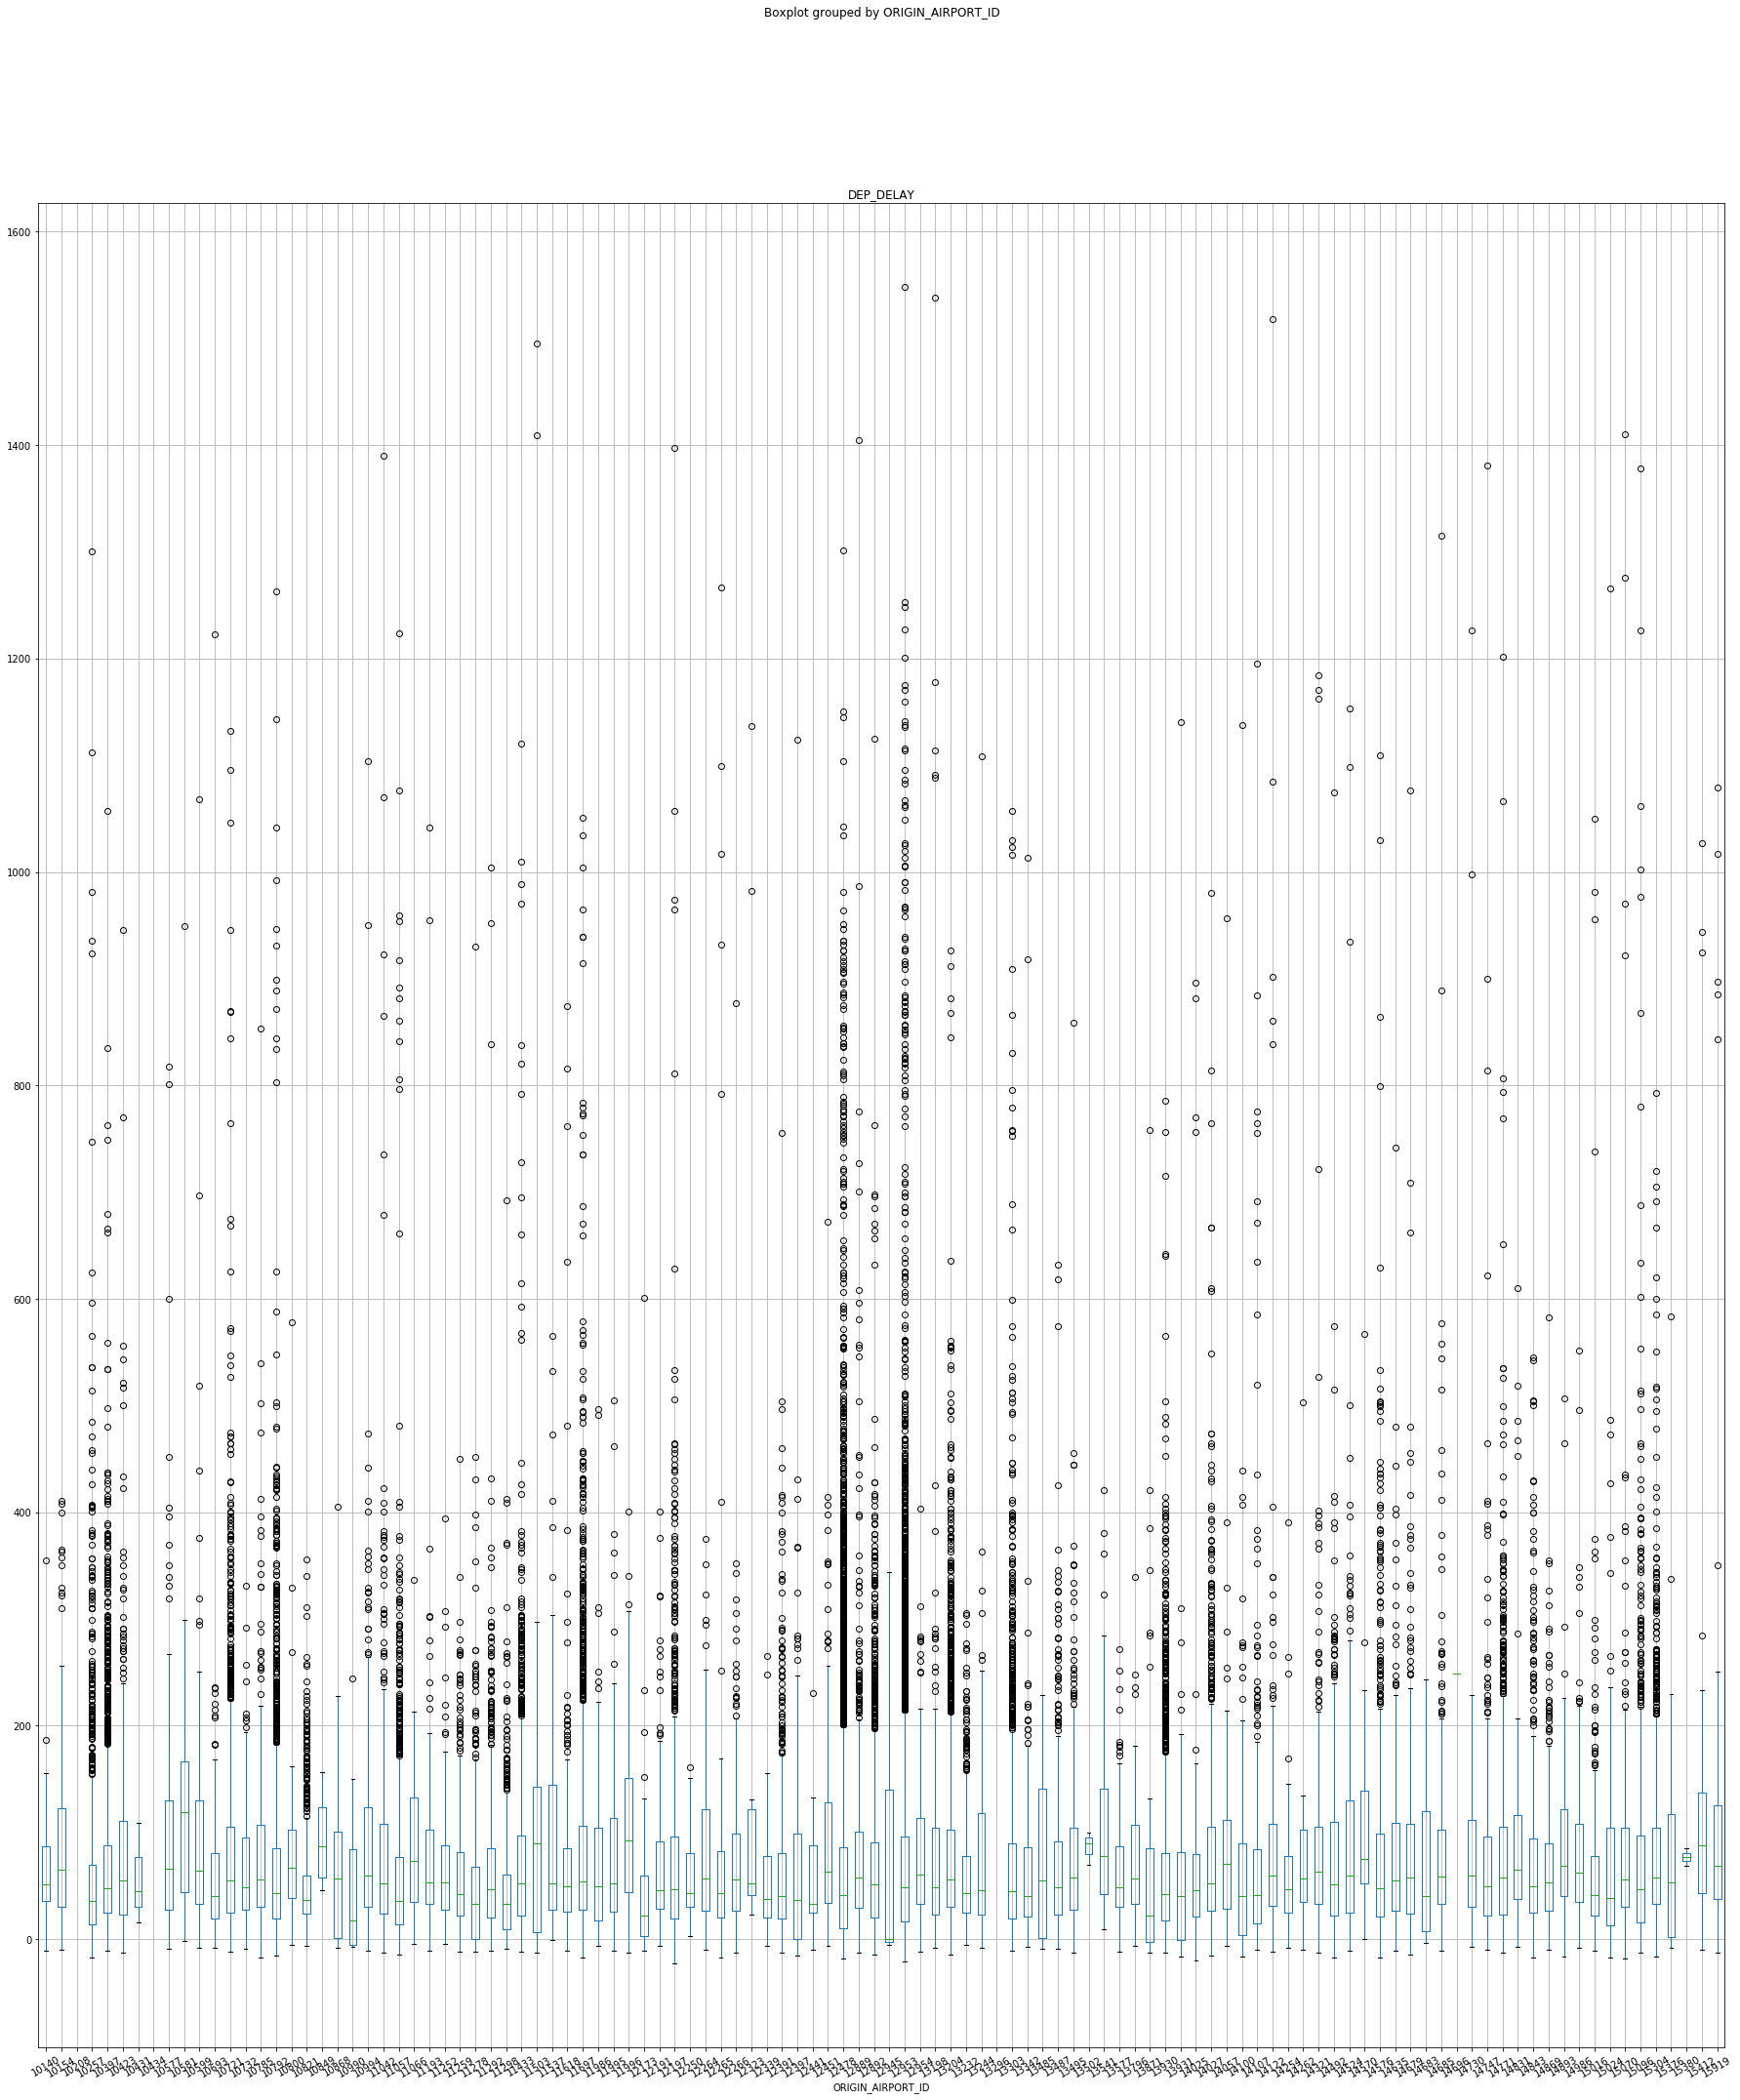

In [27]:
#temp = delay_data[delay_data['ORIGIN_STATE_ABR']=='NY']
f, ax = plt.subplots(1,1, figsize=(30, 35))
ax = delay_data.boxplot('DEP_DELAY','ORIGIN_AIRPORT_ID',rot = 30, ax=ax)
plt.show()

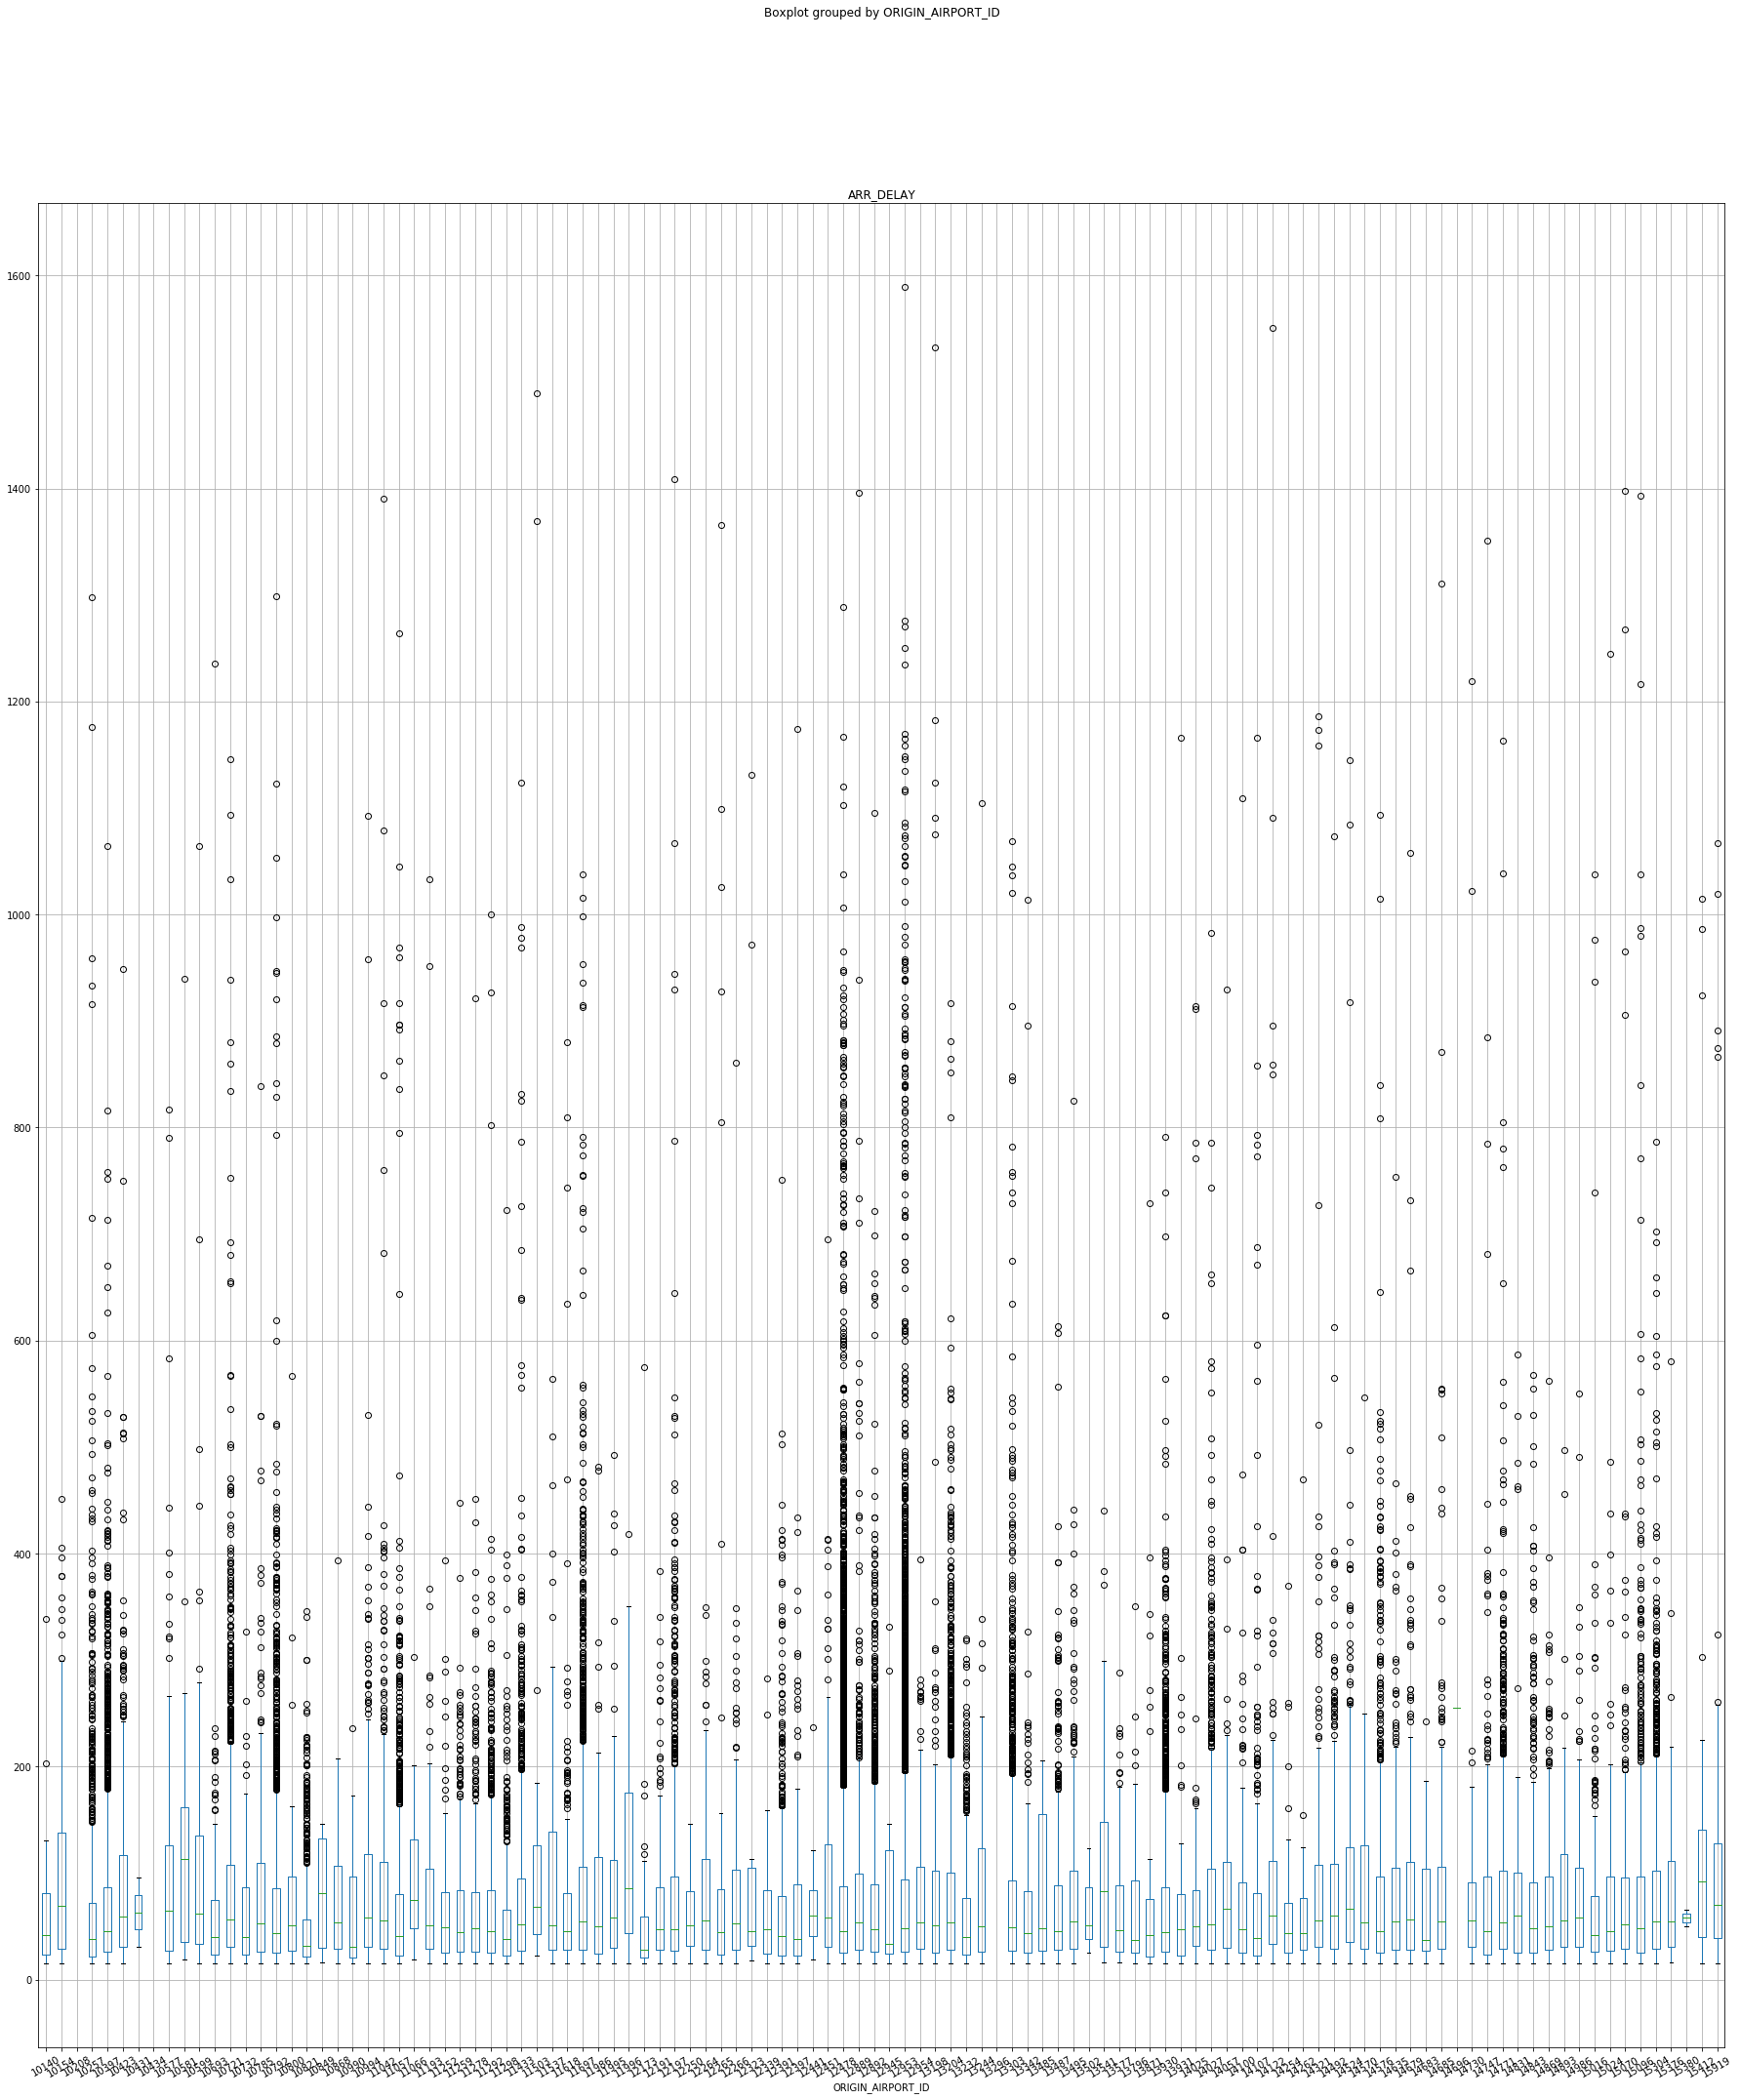

In [28]:
delay_data.boxplot('ARR_DELAY','ORIGIN_AIRPORT_ID',rot = 30,figsize=(30,35))
plt.show()

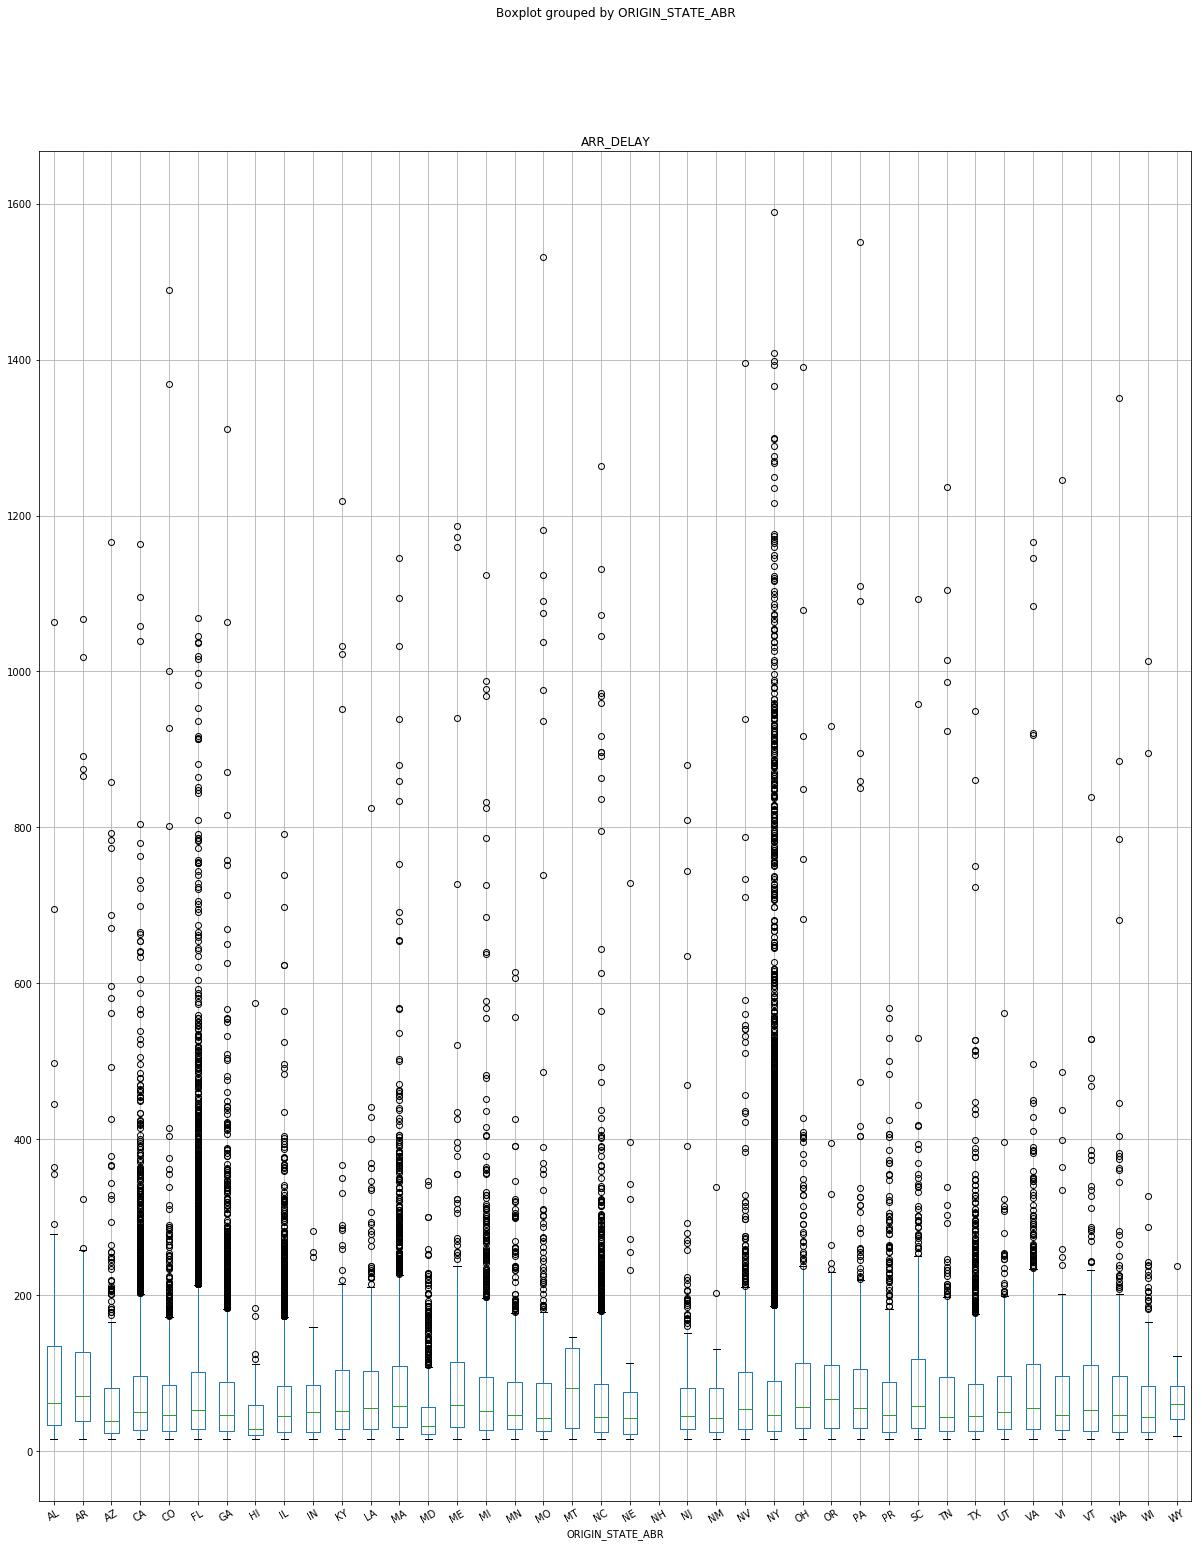

In [29]:
delay_data.boxplot('ARR_DELAY','ORIGIN_STATE_ABR',rot = 30,figsize=(20,25))
plt.show()

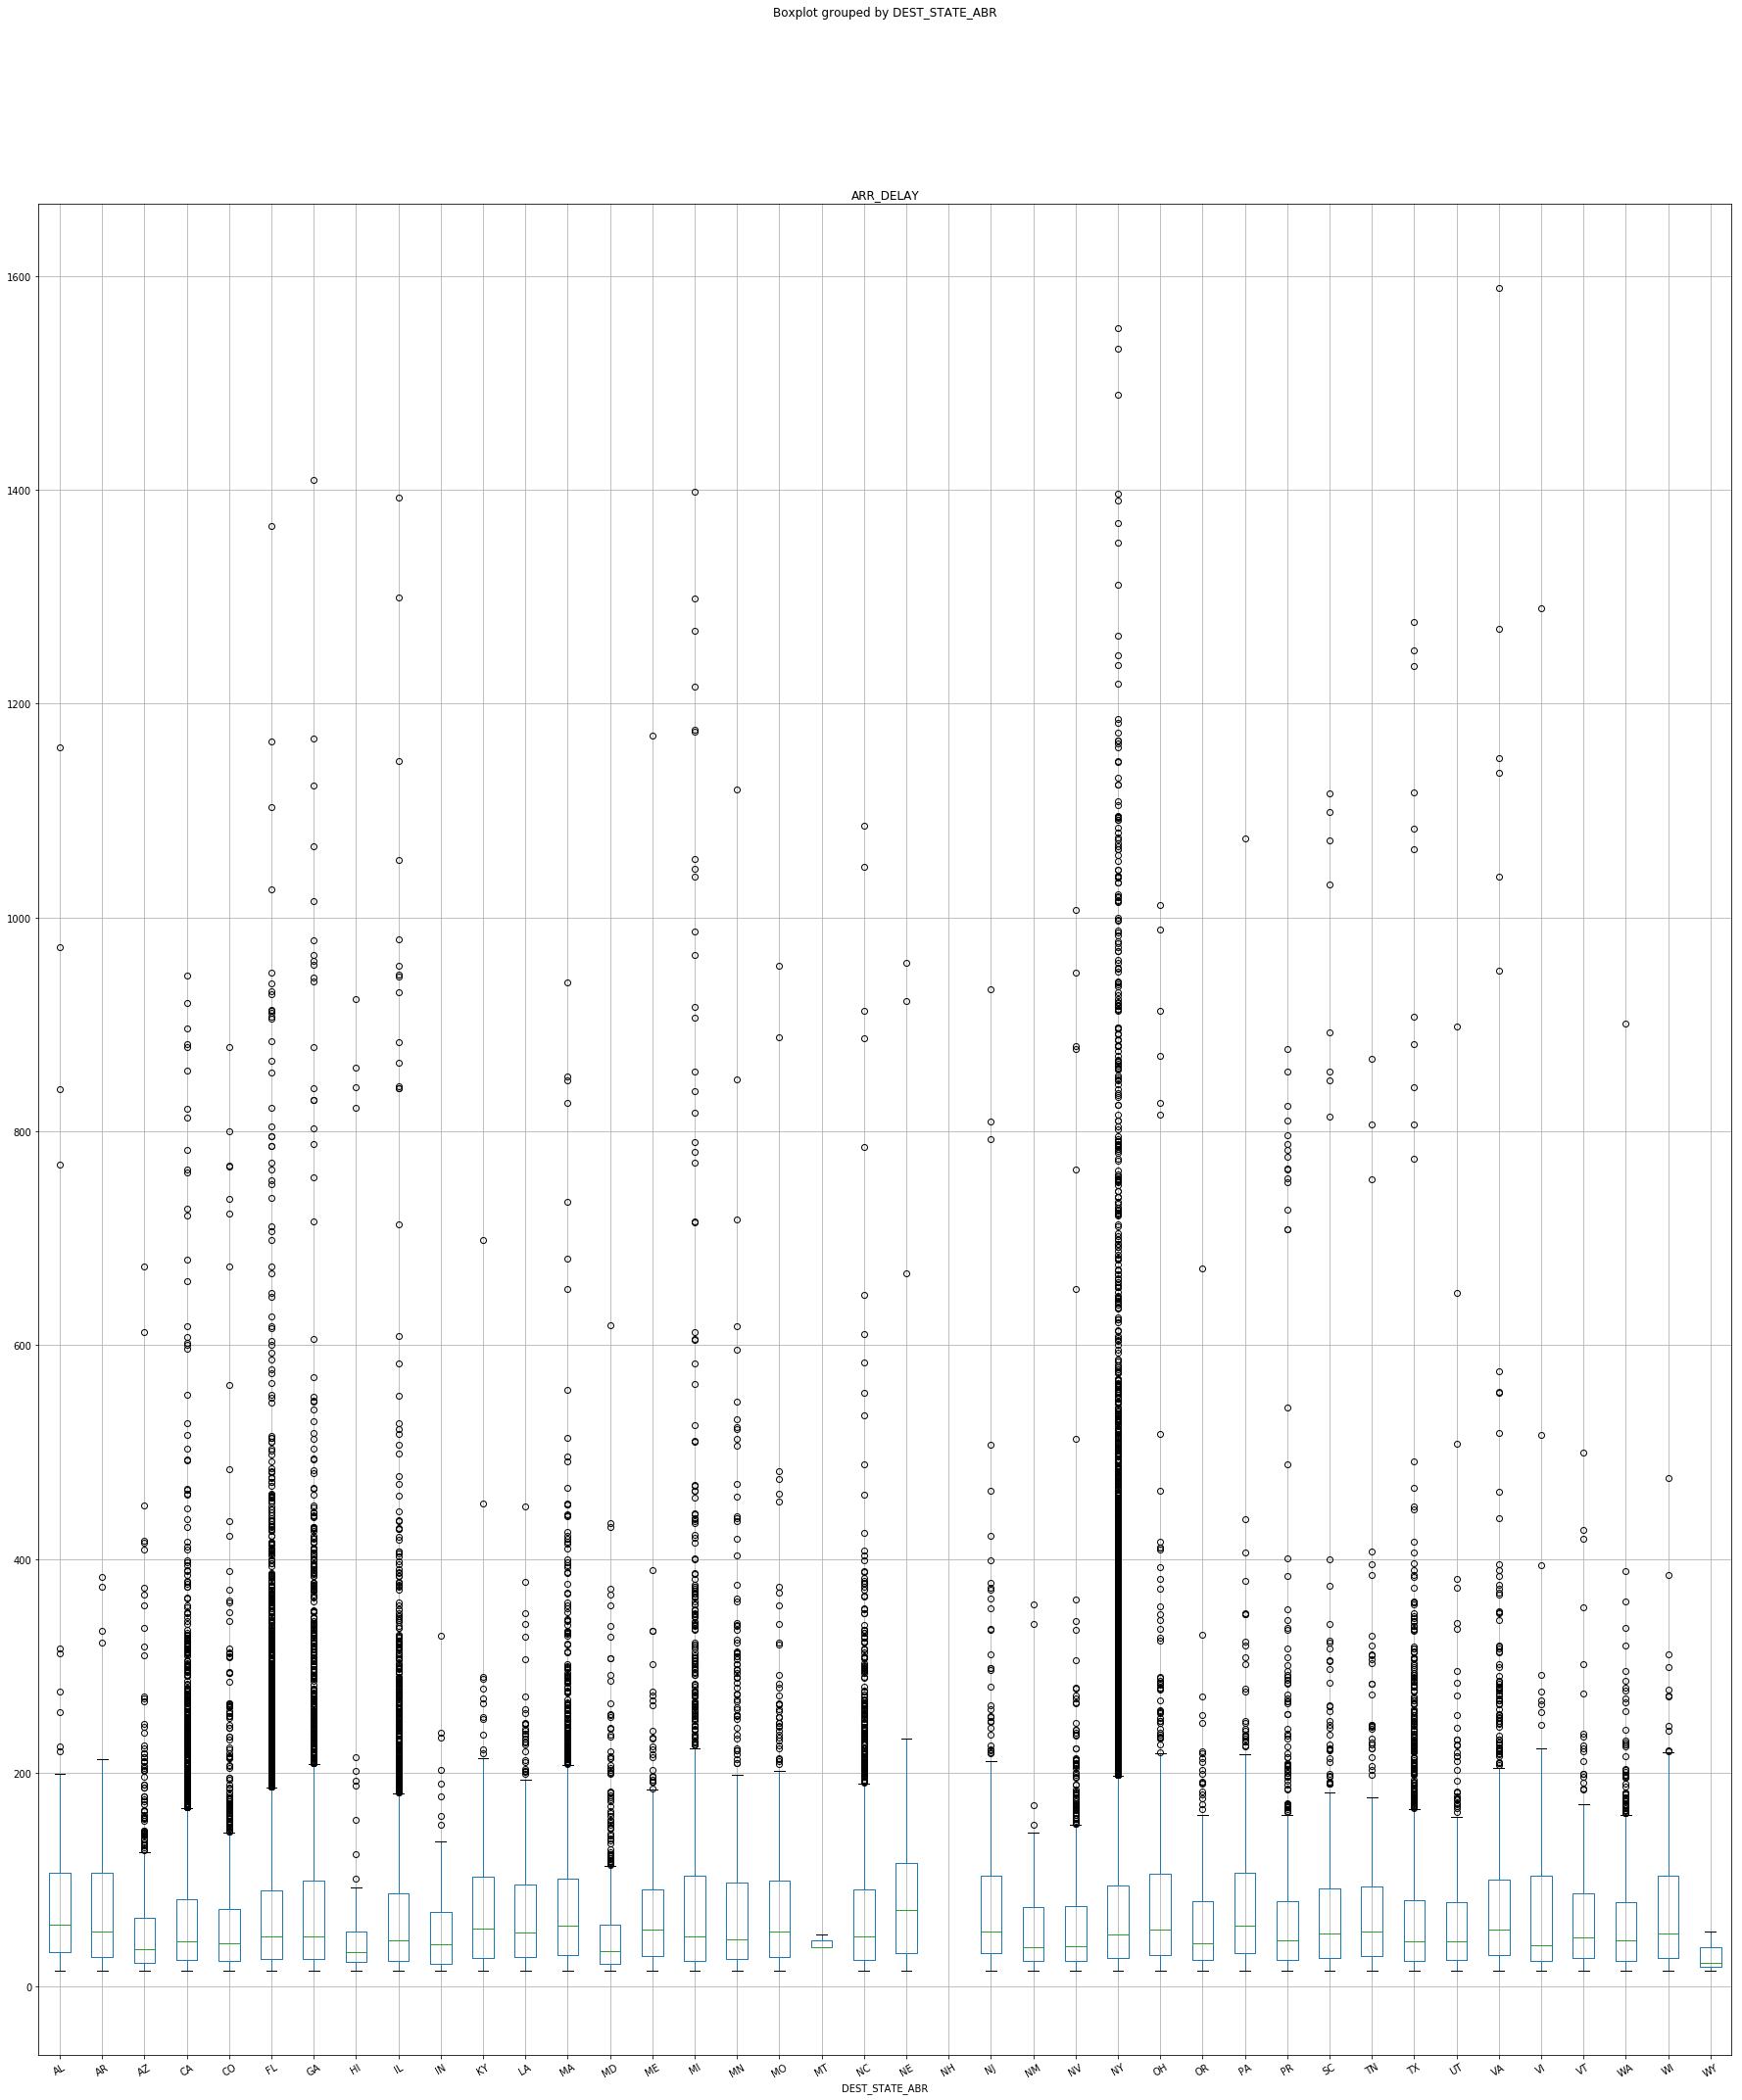

In [30]:
delay_data.boxplot('ARR_DELAY','DEST_STATE_ABR',rot = 30,figsize=(30,35))
plt.show()

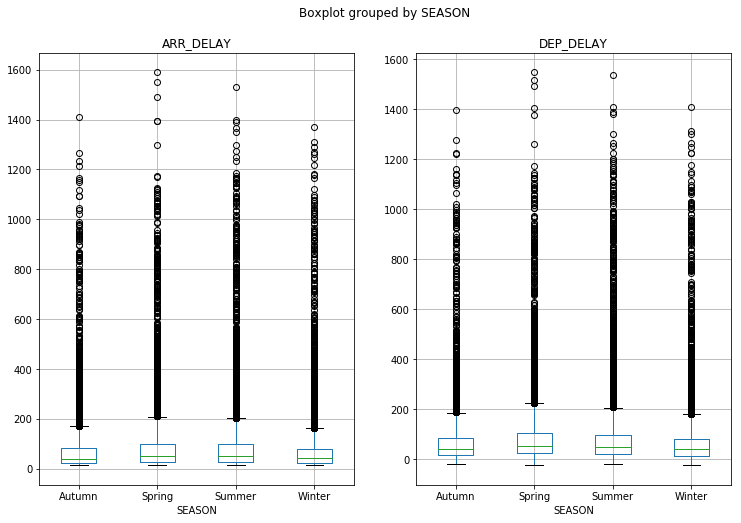

In [31]:
fig, (ax, ax2) = plt.subplots(1,2, figsize=(12, 8))
delay_data.boxplot('ARR_DELAY', 'SEASON', ax=ax)
delay_data.boxplot('DEP_DELAY', 'SEASON', ax=ax2)

plt.show()

## Machine Learning

In [32]:
df = dataset.copy()

# I'm too lazy to write in uppercase
df.columns = [ col.lower() for col in df.columns]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480085 entries, 0 to 480084
Data columns (total 37 columns):
month                  480085 non-null category
day_of_month           480085 non-null int64
unique_carrier         480085 non-null category
airline_id             480085 non-null category
origin_airport_id      480085 non-null category
origin                 480085 non-null category
origin_city_name       480085 non-null object
origin_state_abr       480085 non-null category
origin_state_nm        480085 non-null object
origin_wac             480085 non-null int64
dest_airport_id        480085 non-null category
dest                   480085 non-null category
dest_city_name         480085 non-null object
dest_state_abr         480085 non-null category
dest_state_nm          480085 non-null object
dest_wac               480085 non-null int64
dep_delay              468236 non-null float64
dep_delay_new          468236 non-null float64
dep_del15              468236 non-null categ

In [33]:
# df.origin_wac.sample(10)
# df.origin_wac.value_counts()
# df.dep_delay.value_counts()
# df.dep_delay_new.value_counts()
# df.dep_del15.value_counts()
# df.taxi_out.value_counts()
# df.taxi_in.value_counts()
# df.arr_time
# df.arr_delay.mean()
# df.arr_delay_new.mean()
# df.cancelled.value_counts()
# df.diverted.value_counts()
# df.air_time
# df.flights.value_counts()
# df.distance.value_counts()
# df.distance_group.value_counts()
# df.carrier_delay.value_counts()
# df.weather_delay.value_counts()


In [34]:
excluded_columns = ['origin_wac', 'dest_wac', 'taxi_out', 'taxi_in', 'dep_delay_new', 'arr_delay_new',
                    'cancelled', 'diverted', 'flights', 'distance_group', 'carrier_delay', 
                    'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 
                   ]


labelarized = dict(
    unique_carrier=np.nan,
    origin=np.nan,
    origin_city_name=np.nan,
    origin_state_abr=np.nan,
    origin_state_nm=np.nan,
    dest=np.nan,
    dest_city_name=np.nan,
    dest_state_abr=np.nan,
    dest_state_nm=np.nan,
    
)



In [35]:
from sklearn.preprocessing import LabelEncoder


for col_name, labelEnc in labelarized.items():
    labelEnc = LabelEncoder()
    df[col_name] = labelEnc.fit_transform(df[col_name])
    labelarized[col_name] = labelEnc
    print(col_name, labelEnc)
    


unique_carrier LabelEncoder()
origin LabelEncoder()
origin_city_name LabelEncoder()
origin_state_abr LabelEncoder()
origin_state_nm LabelEncoder()
dest LabelEncoder()
dest_city_name LabelEncoder()
dest_state_abr LabelEncoder()
dest_state_nm LabelEncoder()


In [36]:
# regresion logistica (clasificacion) ARR_DEL15
# regresion lineal ARR_DELAY con DEP_delay lasso


# Linear Regresion model with only one feature

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

included_columns = ['dep_delay', 'arr_delay',]
df2 = df[included_columns].copy().dropna(how='any', axis=0)

target = df2.pop('arr_delay')
X_train, X_test, y_train, y_test = train_test_split(df2, target, test_size=0.3, random_state=42)

model1 = LinearRegression().fit(X_train, y_train)

print('Coeficients: %s' %model1.coef_)
print('Intercept: %s' %model1.intercept_)
print('Train R-square: %s' %model1.score(X_train, y_train))
print('Test R-square: %s' %model1.score(X_test, y_test))



Coeficients: [1.01147653]
Intercept: -7.832303115670003
Train R-square: 0.9110629381084335
Test R-square: 0.9101959246016299


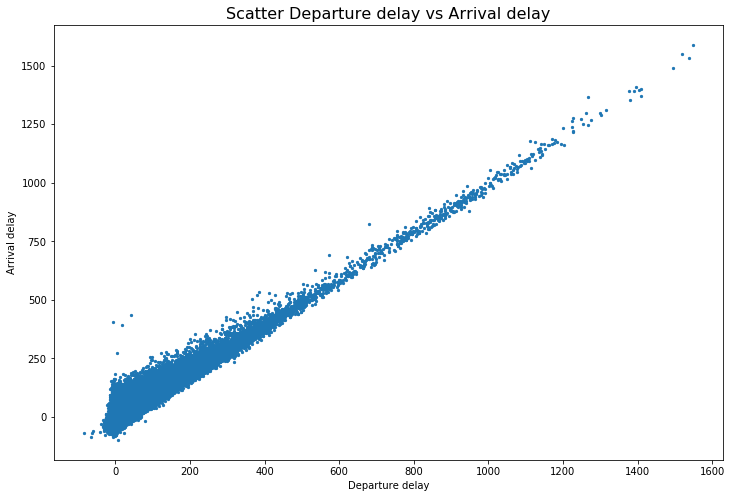

In [38]:
df2['arr_delay'] = target #df[included_columns].copy().dropna(how='any', axis=0)

f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = df2.plot(kind='scatter', x='dep_delay', y='arr_delay', marker='.', ax=ax)

ax.set_title('Scatter Departure delay vs Arrival delay', fontsize=16)
ax.set_xlabel('Departure delay')
ax.set_ylabel('Arrival delay')

plt.show()

In [39]:
included_columns = ['dep_del15', 'arr_delay',]
df4 = df[included_columns].copy().dropna(how='any', axis=0).astype(int)

target = df4.pop('arr_delay')
X_train, X_test, y_train, y_test = train_test_split(df4, target, test_size=0.3, random_state=42)

model3 = LinearRegression().fit(X_train, y_train)

print('Coeficients: %s' %model3.coef_)
print('Intercept: %s' %model3.intercept_)
print('Train R-square: %s' %model3.score(X_train, y_train))
print('Test R-square: %s' %model3.score(X_test, y_test))

Coeficients: [81.28829704]
Intercept: -10.893426555675466
Train R-square: 0.35688431420109534
Test R-square: 0.35562840337765117


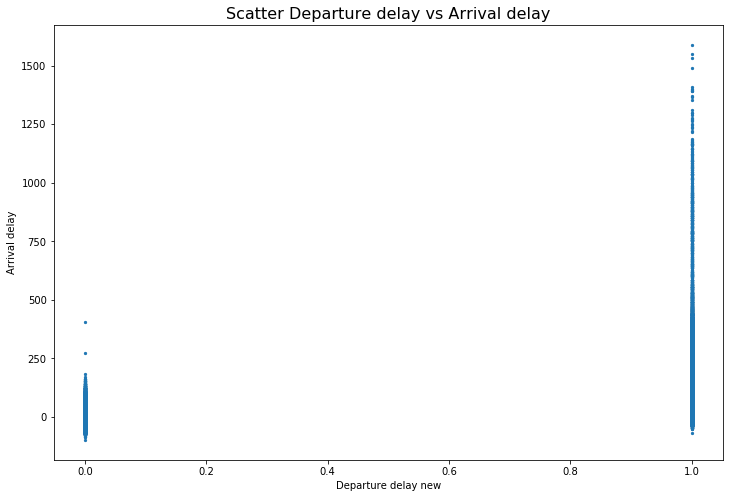

In [40]:
df4['arr_delay'] = target

f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = df4.plot(kind='scatter', x='dep_del15', y='arr_delay', marker='.', ax=ax)

ax.set_title('Scatter Departure delay vs Arrival delay', fontsize=16)
ax.set_xlabel('Departure delay new')
ax.set_ylabel('Arrival delay')

plt.show()

# Linear Regresion with several features

In [41]:
included_columns = ['distance', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 
                    'arr_delay',]
df3 = df[included_columns].copy().dropna(how='any', axis=0)

target = df3.pop('arr_delay')
X_train, X_test, y_train, y_test = train_test_split(df3, target, test_size=0.3, random_state=42)

model2 = LinearRegression().fit(X_train, y_train)

print('Coeficients: %s' %model2.coef_)
print('Intercept: %s' %model2.intercept_)
print('Train R-square: %s' %model2.score(X_train, y_train))
print('Test R-square: %s' %model2.score(X_test, y_test))


Coeficients: [-1.53950008e-16  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00]
Intercept: 1.7053025658242404e-13
Train R-square: 1.0
Test R-square: 1.0


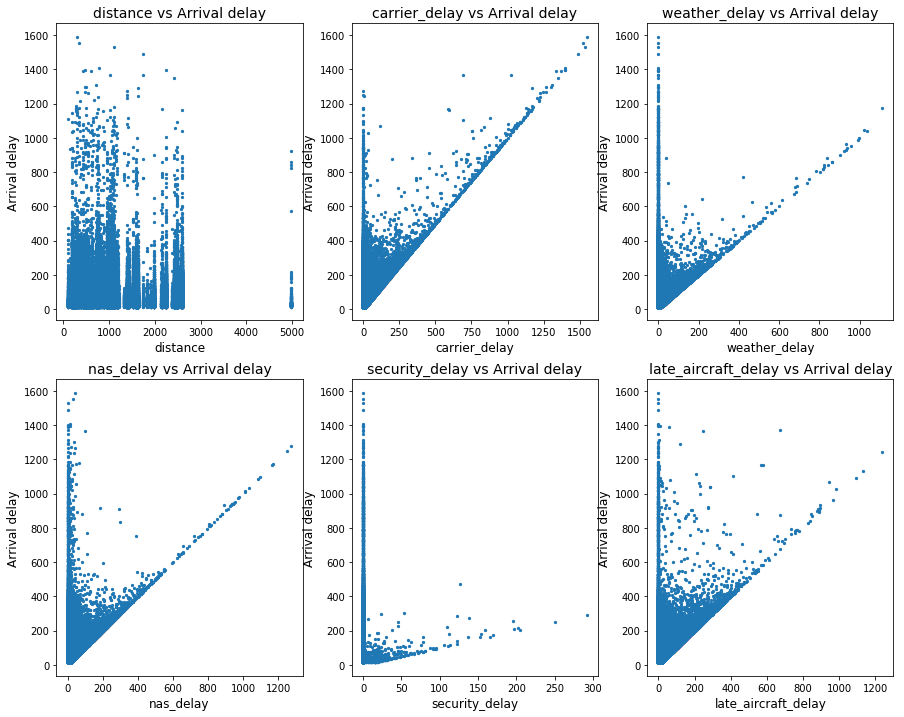

In [42]:
f, AX = plt.subplots(2,3 , figsize=(15, 12))

AX = AX.flatten()

df3['arr_delay'] = target

for ax, col in zip(AX, included_columns[:-1]):
    ax = df3.plot(kind='scatter', x=col, y='arr_delay', marker='.', ax=ax)
    ax.set_title('%s vs Arrival delay'%col, fontsize=14)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel('Arrival delay', fontsize=12)

# AX[-1].axis('off')
plt.show()

In [43]:
included_columns = ['dep_delay', 'late_aircraft_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 
                    'arr_delay',]
df3 = df[included_columns].copy().dropna(how='any', axis=0)

target = df3.pop('arr_delay')
X_train, X_test, y_train, y_test = train_test_split(df3, target, test_size=0.3, random_state=42)

model2 = LinearRegression().fit(X_train, y_train)

print('Coeficients: %s' %model2.coef_)
print('Intercept: %s' %model2.intercept_)
print('Train R-square: %s' %model2.score(X_train, y_train))
print('Test R-square: %s' %model2.score(X_test, y_test))

Coeficients: [3.19024463e-16 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00]
Intercept: 7.105427357601002e-14
Train R-square: 1.0
Test R-square: 1.0


# Logistic Regresion

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

included_columns = ['day_of_month', 'origin_wac','dep_del15', 'dep_delay', 'dep_delay_new', #'late_aircraft_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 
                    'arr_del15',]

df5 = df[included_columns].copy().dropna(how='any', axis=0)
target = df5.pop('arr_del15').astype(int)

X_train, X_test, y_train, y_test = train_test_split(df5, target, test_size=0.3, random_state=42)

model4 = LogisticRegression(random_state=42).fit(X_train, y_train)

print('Coeficients: %s' %model4.coef_)
print('Intercept: %s' %model4.intercept_)
print('Train mean accuracy: %s' %model4.score(X_train, y_train))
print('Test mean accuracy: %s' %model4.score(X_test, y_test))
print('------------------------------------------------------')
print(classification_report(y_test, model4.predict(X_test)))

Coeficients: [[-0.00334426 -0.00447059 -0.10974612  0.10596237  0.01077505]]
Intercept: [-2.41162987]
Train mean accuracy: 0.917122586890328
Test mean accuracy: 0.9187168527439853
------------------------------------------------------
             precision    recall  f1-score   support

          0       0.92      0.98      0.95    107892
          1       0.91      0.72      0.80     32014

avg / total       0.92      0.92      0.92    139906

